# Clustering Crypto

In [147]:
# Initial imports
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Data Preprocessing

In [148]:
# Loade the cryptocurrencies data
file_path = Path("Resources/crypto_data.csv")
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [149]:
crypto_df.dtypes

CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [150]:
# Keep only cryptocurrencies that are on trading
Ncrypto_df = crypto_df.loc[crypto_df["IsTrading"] == True ]
Ncrypto_df.head(5)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [151]:
# Keep only cryptocurrencies
import math
Ncrypto_df = Ncrypto_df.loc[Ncrypto_df["Algorithm"] != "N/A"]
Ncrypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [152]:
# Remove the "IsTrading" column
Ncrypto_df.drop(columns=["IsTrading"], inplace=True)
Ncrypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [153]:
for column in Ncrypto_df.columns:
    print(f"Column {column} has {Ncrypto_df[column].isnull().sum()} null values")

Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [154]:
# Remove rows with at least 1 null value
Ncrypto_df.dropna()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [155]:
# Remove rows with cryptocurrencies without coins mined

Ncrypto_df = Ncrypto_df.loc[Ncrypto_df["TotalCoinsMined"] >= 0]
Ncrypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [156]:
# Fetch the cryptocurrencies names prior to drop them from crypto_df
Coin_names_df = crypto_df["CoinName"].to_frame()
Coin_names_df.head()

,CoinName
42,42 Coin
365,365Coin
404,404Coin
611,SixEleven
808,808


In [157]:
# Remove the cryptocurrency name since it's not going to be used on the clustering algorithm
Ncrypto_df.drop(columns=["CoinName"], inplace=True)
Ncrypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
808,SHA-256,PoW/PoS,0.000000e+00,0
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000


In [158]:
# Create dummies variables for text features
X =  pd.get_dummies(columns=["Algorithm", "ProofType"], data=Ncrypto_df)
X.head()                    

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
808,0.000000e+00,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
# Standardize data


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

### Reducing Dimensions Using PCA

In [160]:
# Use PCA to reduce dimension to 3 principal components
pca = PCA(n_components=3)

In [161]:
# Create a DataFrame with the principal components data
Crypto_pca = pca.fit_transform(X)
Crypto_pca

array([[-0.21945942,  1.28403187, -0.43433601],
       [-0.20516545,  1.28262626, -0.43493066],
       [-0.19132038,  0.73037173, -0.28196999],
       ...,
       [-0.12968402, -2.35238628,  0.23845228],
       [-0.23503146, -2.02712538,  0.22868992],
       [-0.07094361,  0.88259913, -0.16415728]])

### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

In [162]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range ok k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(Crypto_pca)
    inertia.append(km.inertia_)


# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

Running K-Means with `k=4`

In [170]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(Crypto_pca)

# Predict clusters
predictions = model.predict(Crypto_pca)

# Create a new DataFrame including predicted clusters and cryptocurrencies features
df_Crypto_pca = pd.DataFrame(
    data=Crypto_pca,
    columns=["principal component 1", "principal component 2", "principal component 3"],index=Ncrypto_df.index
)
df_Crypto_pca["class"] = model.labels_
df_Crypto_pca.head()

,principal component 1,principal component 2,principal component 3,class
42,-0.219459,1.284032,-0.434336,1
404,-0.205165,1.282626,-0.434931,1
808,-0.191320,0.730372,-0.281970,1
1337,0.237009,1.863524,-0.457452,1
BTC,-0.228785,-1.537941,0.095196,0


In [164]:
pca.explained_variance_ratio_

array([0.02083669, 0.01961431, 0.01876612])

In [171]:
df_Crypto_pca.head()

,principal component 1,principal component 2,principal component 3,class
42,-0.219459,1.284032,-0.434336,1
404,-0.205165,1.282626,-0.434931,1
808,-0.191320,0.730372,-0.281970,1
1337,0.237009,1.863524,-0.457452,1
BTC,-0.228785,-1.537941,0.095196,0


In [172]:
clustered_df = pd.concat([df_Crypto_pca, Ncrypto_df], sort=False, axis = 1)
clustered_df.head()

,principal component 1,principal component 2,principal component 3,class,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,-0.219459,1.284032,-0.434336,1,Scrypt,PoW/PoS,4.199995e+01,42
404,-0.205165,1.282626,-0.434931,1,Scrypt,PoW/PoS,1.055185e+09,532000000
808,-0.191320,0.730372,-0.281970,1,SHA-256,PoW/PoS,0.000000e+00,0
1337,0.237009,1.863524,-0.457452,1,X13,PoW/PoS,2.927942e+10,314159265359
BTC,-0.228785,-1.537941,0.095196,0,SHA-256,PoW,1.792718e+07,21000000


### Visualizing Results

#### 3D-Scatter with Clusters

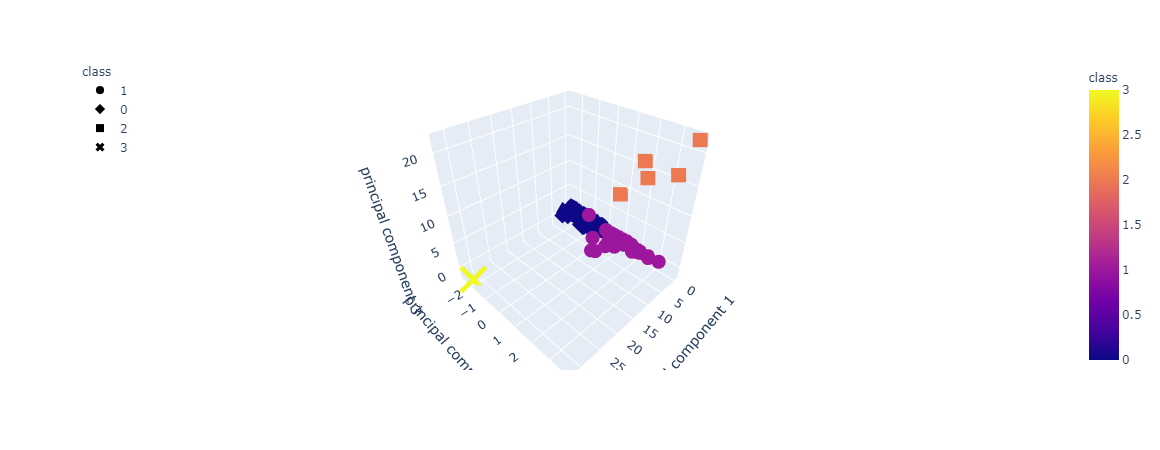

In [173]:
# Create a 3D-Scatt er with the PCA data and the clusters
fig = px.scatter_3d(
    df_Crypto_pca,
    x= "principal component 1",
    y= "principal component 2",
    z= "principal component 3",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

#### Table of Tradable Cryptocurrencies

In [175]:
crypto_table = clustered_df
crypto_table.hvplot.table()

:Table   [principal component 1,principal component 2,principal component 3,class,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply]

In [176]:
# Print the total number of tradable cryptocurrencies
print(crypto_table.count())

principal component 1    684
principal component 2    684
principal component 3    684
class                    684
Algorithm                684
ProofType                684
TotalCoinsMined          684
TotalCoinSupply          684
dtype: int64


#### Scatter Plot with Tradable Cryptocurrencies

In [211]:
# Scale data to create the scatter plot,
Coin_names_scaled = MinMaxScaler().fit_transform(clustered_df[["TotalCoinsMined", "TotalCoinSupply"]])
print(Coin_names_scaled[0:2])

[[4.24246795e-11 4.55364914e-16]
 [1.06585549e-03 5.76795558e-09]]


In [212]:
#Coin_names_scaled.head()
Coin_names_scaled = pd.DataFrame(Coin_names_scaled, columns=["TotalCoinsMined", "TotalCoinSupply"], index=clustered_df.index)

Coin_names_scaled.head()

,TotalCoinsMined,TotalCoinSupply
42,4.242468e-11,4.553649e-16
404,1.065855e-03,5.767956e-09
808,0.000000e+00,0.000000e+00
1337,2.957551e-02,3.406122e-06
BTC,1.810846e-05,2.276825e-10


In [213]:
Coin_names_scaled["class"] = clustered_df["class"]
Coin_names_scaled.head()

,TotalCoinsMined,TotalCoinSupply,class
42,4.242468e-11,4.553649e-16,1
404,1.065855e-03,5.767956e-09,1
808,0.000000e+00,0.000000e+00,1
1337,2.957551e-02,3.406122e-06,1
BTC,1.810846e-05,2.276825e-10,0


In [215]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
Coin_names_scaled.hvplot.scatter(x="TotalCoinsMined", y="TotalCoinSupply" , by="class"
)


:NdOverlay   [class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply)